In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file = '/Users/anawinp/Projects/spotify_artists/data/artists.csv'
df=pd.read_csv(file)
df.head(15)
df.info()
df.describe()
df.isna().sum()
df.fillna(0)

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"
5,Justin Bieber,"47,525.7",18.868,"27,988.0","17,183.9","19,537.7"
6,Eminem,"42,029.0",20.175,"35,475.8","21,576.7","6,553.2"
7,Ariana Grande,"40,111.0",17.158,"33,219.8","23,307.3","6,891.2"
8,J Balvin,"38,774.8",11.784,"17,450.7","5,699.8","21,324.2"
9,Post Malone,"38,002.7",21.095,"34,494.0","18,943.9","3,508.6"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


,Daily
count,2994.000000
mean,1.854522
std,3.758283
min,0.002000
25%,0.480250
50%,0.871000
75%,1.774250
max,85.793000


Artist          0
Streams         0
Daily           6
As lead        16
Solo           69
As feature    338
dtype: int64

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"
...,...,...,...,...,...,...
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,0


In [45]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.fillna(0)
df.isna().any()
df = df.replace(',', '', regex=True)
df['artist'] = df['artist'].astype(str)
df['streams'] = df['streams'].astype(float)
df['solo'] = df['solo'].astype(float)
df['as_lead'] = df['as_lead'].astype(float)
df['as_feature'] = df['as_feature'].astype(float)
df.head(15)
df.info()
# streams = as_lead + as_feature

artist        False
streams       False
daily         False
as_lead       False
solo          False
as_feature    False
dtype: bool

,artist,streams,daily,as_lead,solo,as_feature
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8
5,Justin Bieber,47525.7,18.868,27988.0,17183.9,19537.7
6,Eminem,42029.0,20.175,35475.8,21576.7,6553.2
7,Ariana Grande,40111.0,17.158,33219.8,23307.3,6891.2
8,J Balvin,38774.8,11.784,17450.7,5699.8,21324.2
9,Post Malone,38002.7,21.095,34494.0,18943.9,3508.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   artist      3000 non-null   object 
 1   streams     3000 non-null   float64
 2   daily       3000 non-null   float64
 3   as_lead     3000 non-null   float64
 4   solo        3000 non-null   float64
 5   as_feature  3000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 140.8+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Bad Bunny'),
  Text(2, 0, 'Taylor Swift'),
  Text(3, 0, 'The Weeknd'),
  Text(4, 0, 'Ed Sheeran'),
  Text(5, 0, 'Justin Bieber'),
  Text(6, 0, 'Eminem'),
  Text(7, 0, 'Ariana Grande'),
  Text(8, 0, 'J Balvin'),
  Text(9, 0, 'Post Malone')])

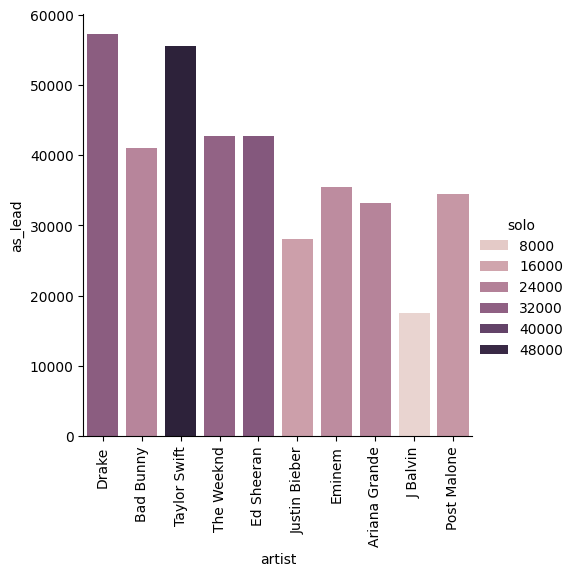

In [56]:
#plot the top 10 artists streams as_lead, and as_feature
sns.catplot(x='artist',y='as_lead', data = df.head(10), kind='bar', hue = 'solo')
plt.xticks(rotation = 90)
plt.show()

,artist,streams,daily,as_lead,solo,as_feature
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
8,J Balvin,38774.8,11.784,17450.7,5699.8,21324.2
17,Nicki Minaj,30759.8,16.361,10631.1,6013.9,20128.7
5,Justin Bieber,47525.7,18.868,27988.0,17183.9,19537.7
14,Ozuna,33315.0,13.737,13957.5,6226.7,19357.5
11,Travis Scott,37489.0,38.359,18839.2,14960.2,18649.7
28,Lil Wayne,26657.9,11.466,10013.0,2787.0,16644.9
16,Future,31001.7,20.513,15374.1,7299.6,15627.6
44,Farruko,20784.1,8.096,5669.1,3160.4,15115.0


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

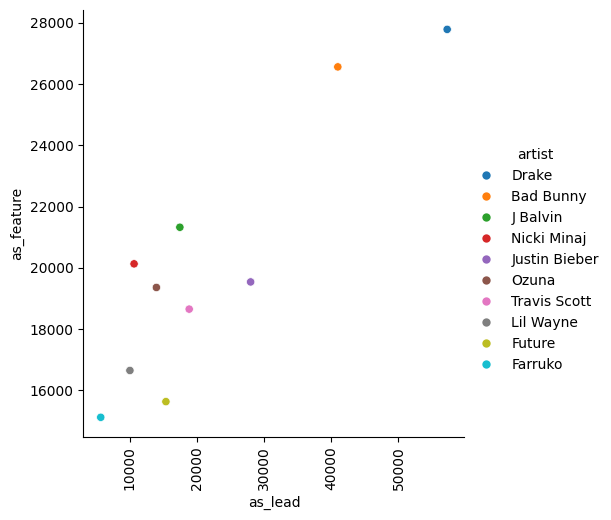

In [71]:
# df.head(10)
top10_features = df.nlargest(10,'as_feature')
top10_features
sns.relplot(x='as_lead',y='as_feature', data = top10_features, kind='scatter', hue='artist')
plt.xticks(rotation = 90)
plt.show()

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000')])

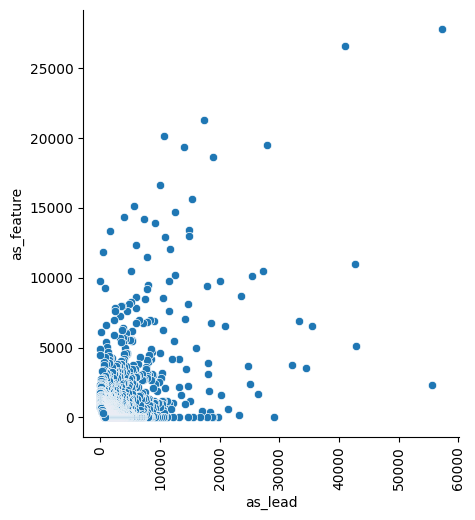

In [76]:
sns.relplot(x='as_lead',y='as_feature', data = df, kind='scatter')
plt.xticks(rotation = 90)
plt.show()